In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import helpers
import plots
import tem

In [3]:
dur = 0.1
dt = 1e-5
f = 256 
bw = 2*np.pi*f
t = np.arange(0, dur, dt)

u = helpers.gen_band_limited(dur, dt, f)

b = 3.5  # bias
delta = 0.05  # threshold
k = 0.01 # scaling factor

dte = 0

In [4]:
interval_lengths, ys, zs = tem.TEM_encode(u, dt, b, delta, k, dte, quad_method='rect')

u_rec = tem.TEM_decode(interval_lengths, dur, dt, bw, b, delta, k)

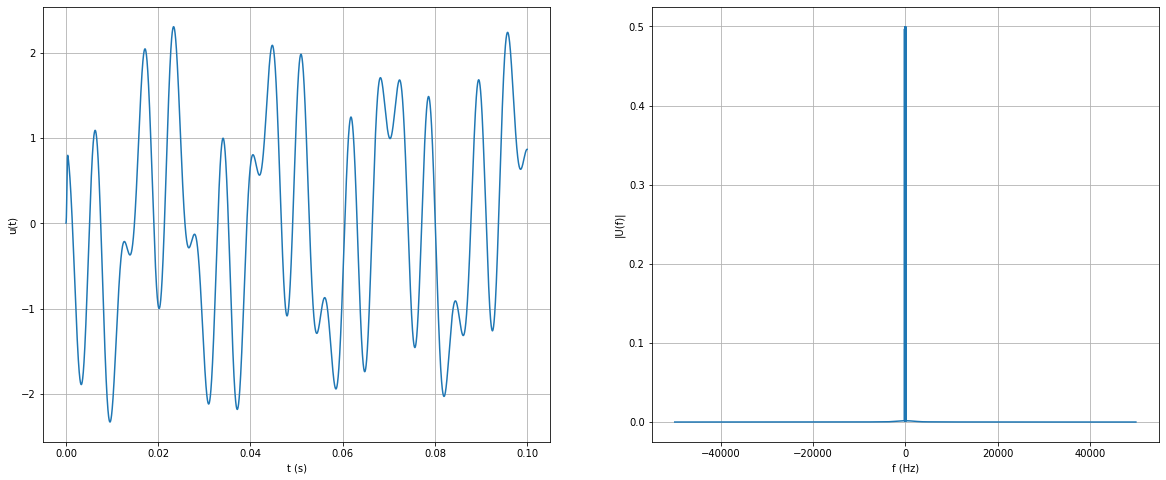

In [5]:
plots.plot_signal_and_fourier(t, u, dt)

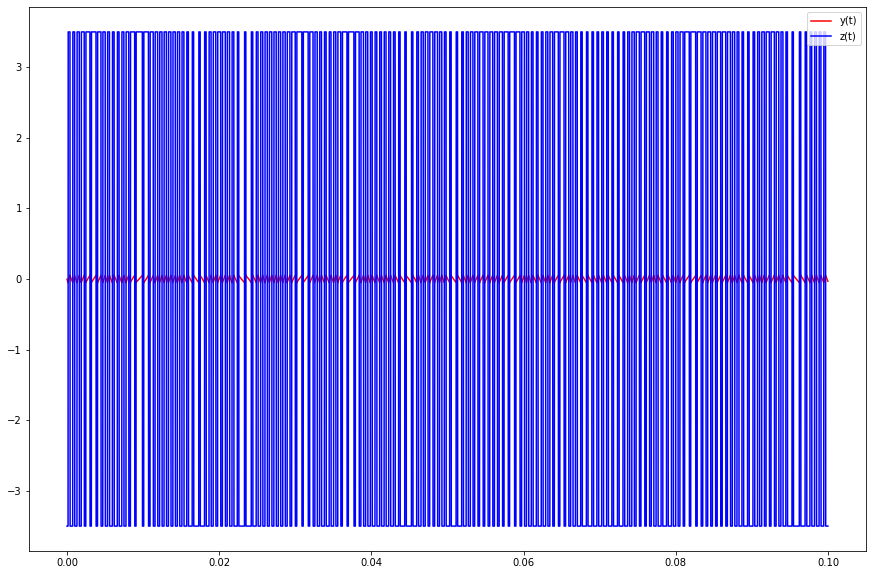

In [6]:
plots.plot_integral_and_spikes(t, ys, zs, 'lazar')

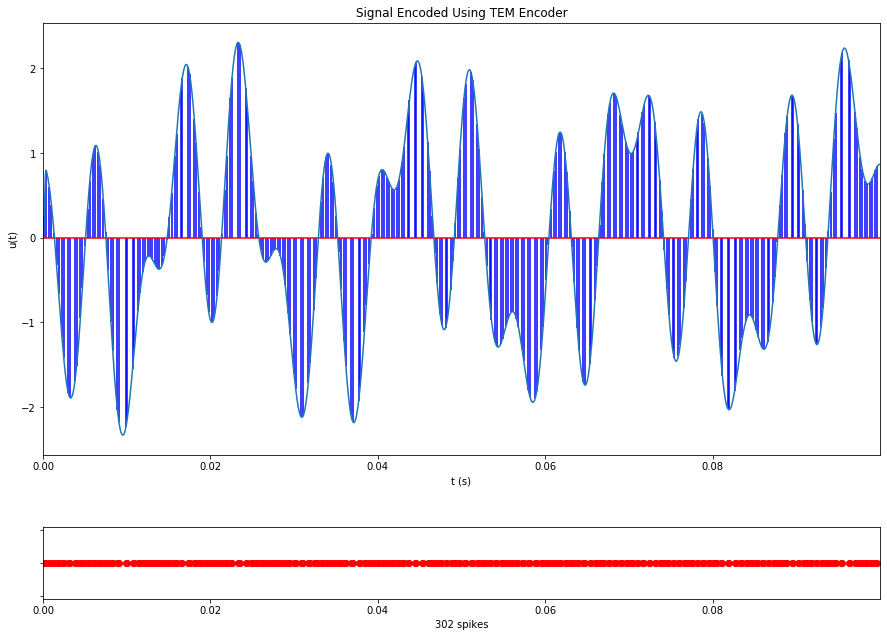

In [7]:
fig_title = 'Signal Encoded Using TEM Encoder'
plots.plot_encoded(t, u, np.cumsum(interval_lengths), fig_title)

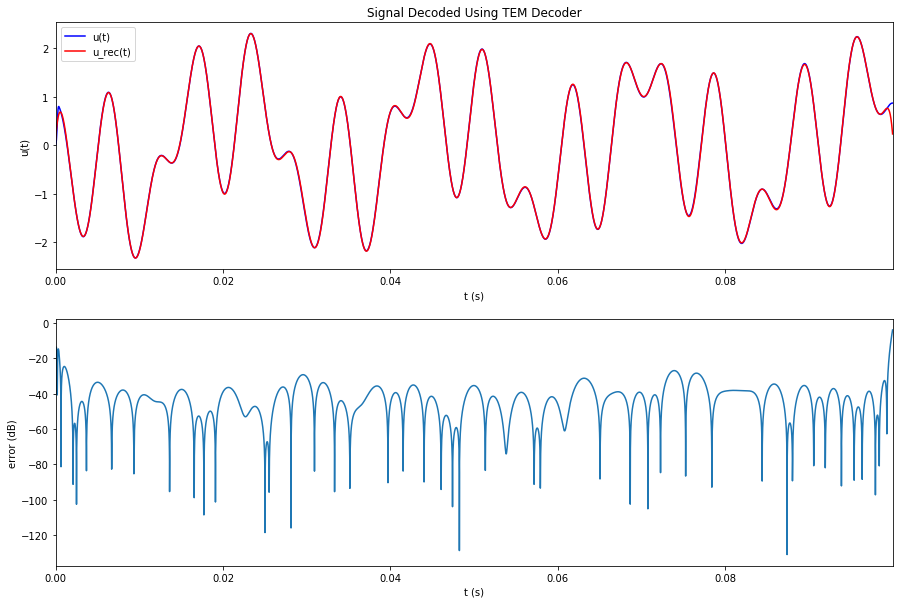

In [8]:
fig_title = 'Signal Decoded Using TEM Decoder'
plots.plot_compare(t, u, u_rec, fig_title)